In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In [6]:
data = pd.read_csv('fetal_health.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
data.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
39,115.0,0.009,0.055,0.005,0.000,0.0,0.0,27.0,2.3,0.0,...,53.0,182.0,7.0,0.0,119.0,120.0,120.0,14.0,0.0,1.0
270,124.0,0.010,0.000,0.007,0.001,0.0,0.0,34.0,1.0,0.0,...,106.0,148.0,1.0,0.0,126.0,130.0,130.0,7.0,0.0,1.0
1250,112.0,0.008,0.000,0.006,0.000,0.0,0.0,25.0,1.3,0.0,...,105.0,142.0,1.0,0.0,114.0,115.0,115.0,4.0,-1.0,1.0
1015,139.0,0.007,0.000,0.005,0.000,0.0,0.0,38.0,0.9,0.0,...,136.0,170.0,1.0,0.0,144.0,146.0,146.0,4.0,-1.0,1.0
1372,121.0,0.008,0.000,0.005,0.000,0.0,0.0,32.0,1.0,0.0,...,110.0,157.0,1.0,0.0,131.0,131.0,131.0,8.0,0.0,1.0


In [25]:
data.describe().loc[['min','max']]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
min,106.0,0.000,0.000,0.000,0.000,0.000,0.000,12.0,0.2,0.0,...,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0,1.0
max,160.0,0.019,0.481,0.015,0.015,0.001,0.005,87.0,7.0,91.0,...,159.0,238.0,18.0,10.0,187.0,182.0,186.0,269.0,1.0,3.0


In [18]:
corr_data = data.copy()
correlation_matrix = corr_data.corr()

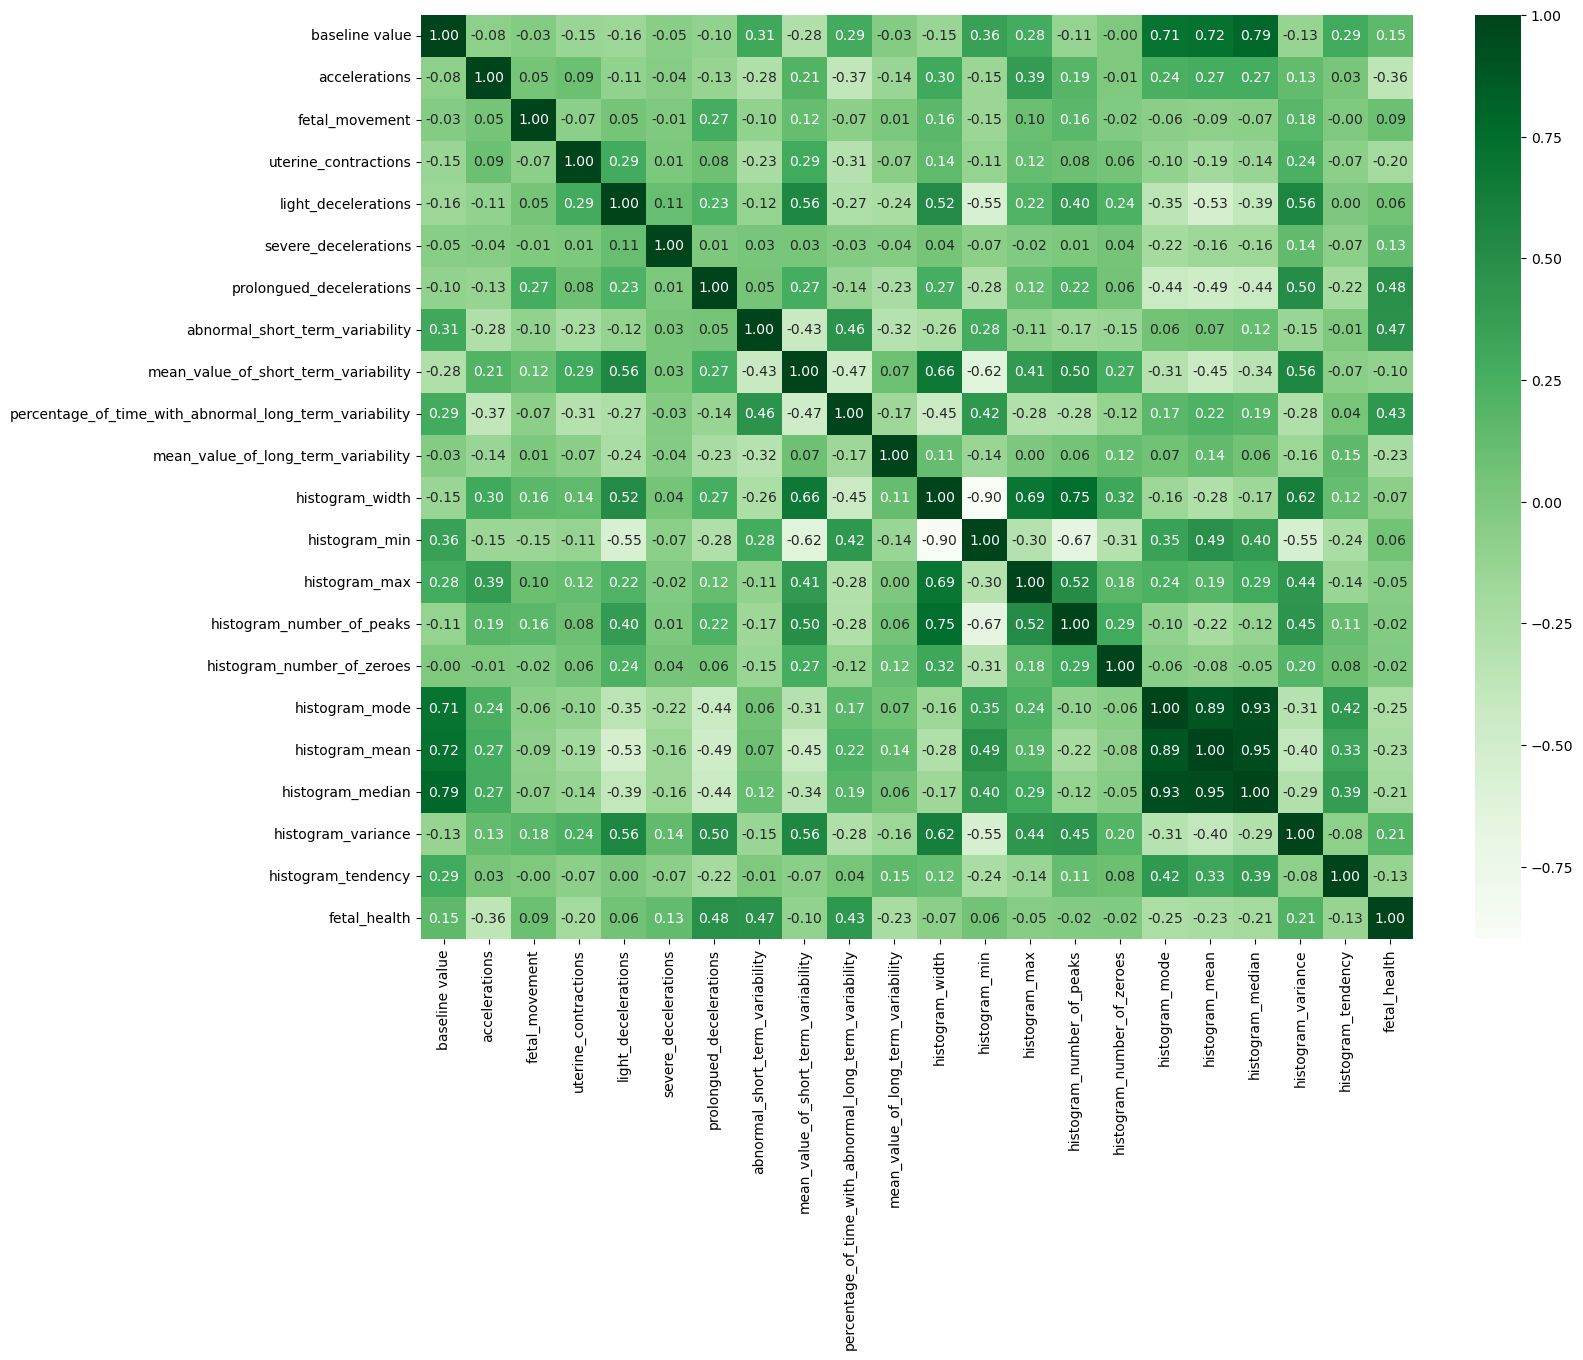

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()

In [23]:
data_melted = data.melt(var_name='column')
data_melted.sample(5)

,column,value
41928,histogram_variance,3.000
25691,histogram_min,59.000
3201,accelerations,0.002
33442,histogram_number_of_zeroes,0.000
29303,histogram_max,154.000


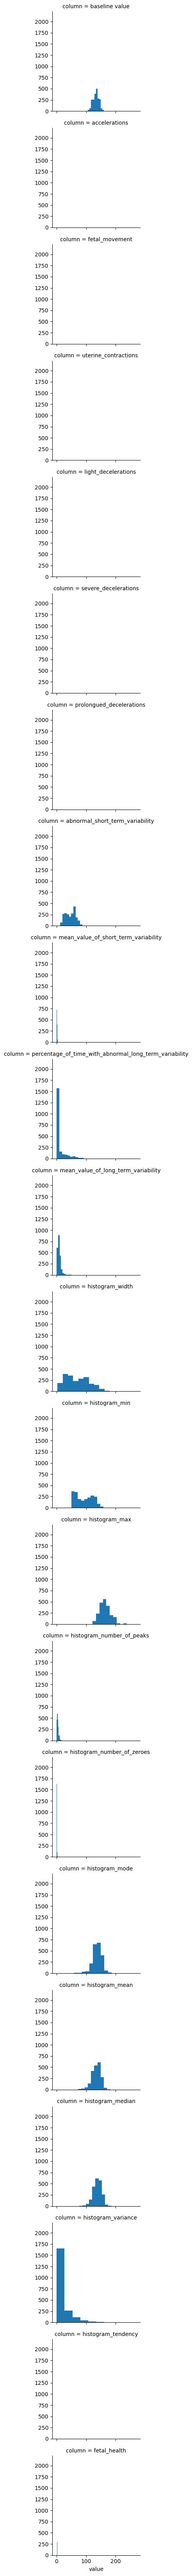

In [27]:
g = sns.FacetGrid(data_melted, row='column')
g.map(plt.hist, 'value')